# Proyecto (mapas, visualizacion)

In [126]:
# --- General ---
import os

# --- Data ---
import pandas as pd
from pandasql import sqldf
import numpy as np
import statistics as stats
import random

# --- Conexión ---
# import elasticsearch

# --- Procesamiento lenguaje: spacy ---
# import spacy
# from spacy.matcher import Matcher
# from spacy.matcher import PhraseMatcher

# --- Procesamiento lenguaje: gensim ---
# import gensim
# import gensim.corpora as corpora
# from gensim.models import CoherenceModel

# --- Prediccion Positividad: POS, NEU, NEG ---
# from tqdm import tqdm
# from transformers import pipeline
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# --- Visualización ---
# import pyLDAvis
# import pyLDAvis.gensim_models
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

# ==============================================================================

# --- Configuración ---
# User password
password = os.environ.get('SOPHIA2')

# - - - geoData - - -
import tools_region as tr

# --- Funciones ---
# Cargar paquete de español mediano
# nlp = spacy.load("es_core_news_md")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [127]:
data_regiones_comunas = tr.search_region('Región_de_Los_Lagos')
if(data_regiones_comunas):
    region = data_regiones_comunas['region']
    comunas = data_regiones_comunas['comunas']

Region encontrada


In [128]:
# {nombre_archivo}_{words}_{from_}_{to_}_dominant_topic.csv
# nombre_archivo = 'data_Region_X_2022-01-01_2022-01-07_dominant_topic'
nombre_archivo = 'data_Region_X_EMPLEO_comunas_2022-01-01_2022-06-30_dominant_topic'

### Cargamos los datos de comunas con ñ y acentos

In [129]:
# Fixeamos el error mencionado de lectura, para tildes y ñ: utilizamos encoding = 'utf-8
territory = gpd.read_file(r'./regiones_comunas/shape/comunas.shp', encoding='utf-8')
territory

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


#

### Filtramos por código de Región 10 (Región de Los Lagos)

In [130]:
territory = territory[territory["codregion"] == 10]
territory

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
29,133,1.828414e+05,25,13,10307,10,1.087024e+09,2.400442e+05,Región de Los Lagos,San Pablo,Osorno,"POLYGON ((-8174316.930 -4910454.843, -8174109...."
50,113,7.248812e+04,26,13,10206,10,1.761007e+08,9.842672e+04,Región de Los Lagos,Puqueldón,Chiloe,"POLYGON ((-8192405.306 -5246776.357, -8192341...."
51,120,2.626703e+05,25,13,10104,10,2.252031e+09,3.438808e+05,Región de Los Lagos,Fresia,Llanquihue,"MULTIPOLYGON (((-8226493.287 -5038106.271, -82..."
52,122,1.196095e+05,25,13,10107,10,7.650549e+08,1.663208e+05,Región de Los Lagos,Llanquihue,Llanquihue,"POLYGON ((-8161909.969 -5031493.581, -8161797...."
53,127,2.561505e+05,25,13,10301,10,1.656162e+09,3.372027e+05,Región de Los Lagos,Osorno,Osorno,"POLYGON ((-8162032.045 -4927188.771, -8161590...."
54,129,3.460363e+05,25,13,10303,10,2.544876e+09,4.600232e+05,Región de Los Lagos,Purranque,Osorno,"MULTIPOLYGON (((-8230523.146 -5021107.349, -82..."
143,130,3.071611e+05,25,13,10304,10,2.828856e+09,4.132961e+05,Región de Los Lagos,Puyehue,Osorno,"POLYGON ((-8059447.410 -4961786.325, -8057948...."
148,119,5.734616e+05,26,13,10103,10,7.058709e+09,7.852759e+05,Región de Los Lagos,Cochamó,Llanquihue,"MULTIPOLYGON (((-8080034.316 -5118383.675, -80..."
161,342,5.968358e+05,26,13,10202,10,3.214864e+09,6.697127e+05,Región de Los Lagos,Ancud,Chiloe,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82..."
162,115,8.849777e+05,26,13,10208,10,6.296142e+09,1.211081e+06,Región de Los Lagos,Quellón,Chiloe,"MULTIPOLYGON (((-8331772.949 -5403679.835, -83..."


### Conservamos 'Comuna' y 'Geometry', agregamos coordenadas y ordenamos por 'Comuna'
<b>Es muy importante ordenar los datos para posteriormente insertarlos de manera correcta</b>

In [131]:
territory = territory[["Comuna", "geometry"]]
# Creamos coords de referencia
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
territory['coords'] = territory['geometry'].apply(lambda x: x.representative_point().coords[:]);
territory['coords'] = [coords[0] for coords in territory['coords']];
# ordenamos por nombre de comuna
territory = territory.sort_values(by='Comuna')

# Dataframes que utilizaremos
territory_menciones = territory.copy() # copia que se utilizará para menciones
territory_topicos = territory.copy() # copia que se utilizará para topico
territory_positividad = territory.copy() # copia que se utilizará para positividad
territory

/home/alex/miniconda3/envs/myenv/lib/python3.8/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Comuna,geometry,coords
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...","(-8216686.860888084, -5162692.993100001)"
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...","(-8148106.117221469, -5115110.540750001)"
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...","(-8227801.498338105, -5230294.630800001)"
255,Chaitén,"MULTIPOLYGON (((-8129392.200 -5414186.246, -81...","(-8071710.390358558, -5311626.2905)"
164,Chonchi,"MULTIPOLYGON (((-8256151.820 -5284821.114, -82...","(-8226395.884103186, -5264155.132449999)"
148,Cochamó,"MULTIPOLYGON (((-8080034.316 -5118383.675, -80...","(-8036501.702345301, -5124182.419399999)"
263,Curaco de Vélez,"POLYGON ((-8199043.519 -5219286.418, -8199016....","(-8189567.990258642, -5225226.5592)"
168,Dalcahue,"MULTIPOLYGON (((-8258700.750 -5225844.867, -82...","(-8214317.499364937, -5207982.5217)"
51,Fresia,"MULTIPOLYGON (((-8226493.287 -5038106.271, -82...","(-8193670.726446506, -5034990.0834)"
290,Frutillar,"POLYGON ((-8137646.086 -5009326.261, -8137630....","(-8135714.484708065, -5025736.9432500005)"


### Descargamos los archivos de comunas y filtramos repetidos en caso de existir

In [132]:
df = pd.read_csv('./data/'+nombre_archivo+'.csv', encoding='utf-8')
print(f'Tamanio del dataframe: {df.shape}')
df = df.drop_duplicates(subset=['url'])
print(f'Tamanio del dataframe sin duplicados URL: {df.shape}')
df = df.drop_duplicates(subset=['text'])
print(f'Tamanio del dataframe sin duplicados TEXTO: {df.shape}')

# Guardamos el df sin duplicados
df.to_csv('./data/'+nombre_archivo+'_sin_duplicados.csv', index=False, encoding='utf-8')
df.head(3)

Tamanio del dataframe: (1828, 43)
Tamanio del dataframe sin duplicados URL: (1642, 43)
Tamanio del dataframe sin duplicados TEXTO: (1556, 43)


,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text,id_news,country,media_outlet,url,title,...,Dalcahue,Curaco_de_Vélez,Cochamó,Chonchi,Chaitén,Castro,Calbuco,Ancud,title_label,title_score
0,0,3,0.9890,"trabajo, parte, personas, año, región, través,...",Un aumento de mercados laborales poco dispuest...,47316734.0,chile,seminariolocal,https://www.semanariolocal.cl/archivos/6420,Parlamentario pide incentivar contratación de ...,...,0,0,0,0,0,0,0,0,NEU,0.989185
1,1,3,0.9555,"trabajo, parte, personas, año, región, través,...","Casi 415 mil personas estaban empleadas, en pr...",22598469.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2022/05/03/...,En medio de inestabilidad económica preocupa p...,...,0,0,0,0,0,0,0,0,NEG,0.997927
2,2,3,0.9548,"trabajo, parte, personas, año, región, través,...",Luego que el Instituto Nacional de Estadística...,47315857.0,chile,seminariolocal,https://www.semanariolocal.cl/archivos/6842,Solicitan extender IFE Laboral en mujeres para...,...,0,0,0,0,0,0,0,0,NEU,0.952867


In [133]:
# Unique document_Topic and keywords
df_topic_keywords = df[['dominant_Topic', 'keywords']].drop_duplicates()

# Guardaremos en un txt los topicos y sus keywords
with open('./data/txt_pdf/ejemplos_topicos_keywords.txt', 'w') as f:
    for row in df_topic_keywords.iterrows():
        topic = row[1]['dominant_Topic']
        keywords = row[1]['keywords']
        f.write('Topic: {} - Keywords: {}'.format(topic, keywords))
        f.write('\n')

### Ordenamos las comunas y creamos la petición en sqldf

In [134]:
petitionSQLDF  = 'SELECT '
for comuna in comunas :
    # Si encuentra un espacio entonces añade corchetes para la petición en mysql
    if comuna.find(' ') > 0 :
        petitionSQLDF = petitionSQLDF+('sum(['+comuna+']), ')
    else :
        petitionSQLDF = petitionSQLDF+('sum('+comuna+'), ')

petitionSQLDF = petitionSQLDF[:-2] # eliminamos la última coma
petitionSQLDF = petitionSQLDF+' FROM df'
petitionSQLDF

'SELECT sum(Ancud), sum(Calbuco), sum(Castro), sum(Chaitén), sum(Chonchi), sum(Cochamó), sum(Curaco_de_Vélez), sum(Dalcahue), sum(Fresia), sum(Frutillar), sum(Futaleufú), sum(Hualaihué), sum(Llanquihue), sum(Los_Muermos), sum(Maullín), sum(Osorno), sum(Palena), sum(Puerto_Montt), sum(Puerto_Octay), sum(Puerto_Varas), sum(Puqueldón), sum(Purranque), sum(Puyehue), sum(Queilén), sum(Quellón), sum(Quemchi), sum(Quinchao), sum(Río_Negro), sum(San_Juan_de_la_Costa), sum(San_Pablo) FROM df'

### Filtramos por cantidad de menciones totales 

In [135]:
result = sqldf(petitionSQLDF)
result

,sum(Ancud),sum(Calbuco),sum(Castro),sum(Chaitén),sum(Chonchi),sum(Cochamó),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Fresia),sum(Frutillar),...,sum(Puqueldón),sum(Purranque),sum(Puyehue),sum(Queilén),sum(Quellón),sum(Quemchi),sum(Quinchao),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo)
0,111,67,130,31,36,52,23,29,28,57,...,12,38,28,1,37,17,26,23,18,17


In [136]:
# Suma de noticias que hacen mencion a una comuna, se considera sobrelapamiento porlo que podria ser mayor al total
# de noticias recolectadas
sum(result.iloc[0])

1956

In [137]:
values = result.values[0] # esto contiene los valores de sumas de cada comuna

# Añadimos los datos filtrados anteriormente
territory_menciones = territory_menciones.sort_values(by=['Comuna']) # ordenamos alfabéticamente
territory_menciones['values'] = values # añadimos los valores de sumas de cada comuna

# Creamos coords de referencia
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
# territory_menciones['coords'] = territory_menciones['geometry'].apply(lambda x: x.representative_point().coords[:])
# territory_menciones['coords'] = [coords[0] for coords in territory_menciones['coords']]
territory_menciones.head(3)

,Comuna,geometry,coords,values
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...","(-8216686.860888084, -5162692.993100001)",111
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...","(-8148106.117221469, -5115110.540750001)",67
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...","(-8227801.498338105, -5230294.630800001)",130


### Con los datos listos, podemos graficar el numero de menciones hacia cada comuna

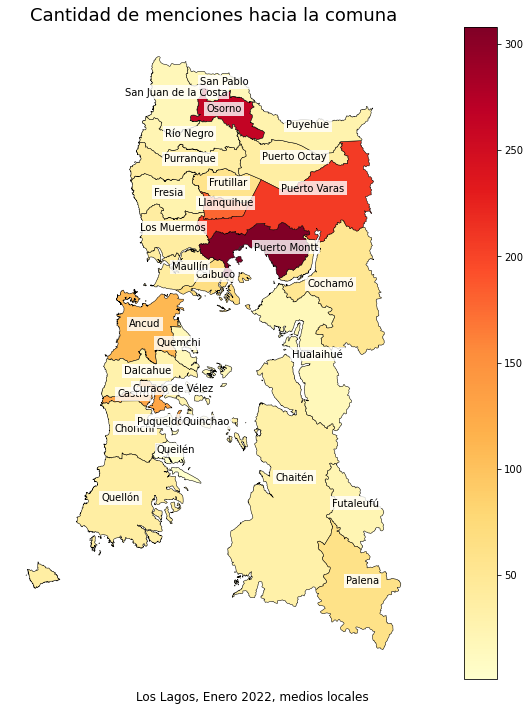

In [138]:
# Graficamos los datos
territory_menciones.plot(column="values", legend=True, figsize=(16, 12), cmap="YlOrRd", edgecolor="black", linewidth=0.5).set_axis_off();
# Información
plt.title("Cantidad de menciones hacia la comuna", fontsize=18);

for idx, row in territory_menciones.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(0.6, 0.1, "Los Lagos, Enero 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Cantidad de menciones hacia la comuna"), bbox_inches = "tight",transparent = True)

### Grafico mapa por topico relevante

In [139]:
# Copia distinta del df
df_topics = df.copy()

In [140]:
def get_moda_list(lista):
    '''
    Parameters:
        lista (list): lista de valores
    Return (int):
        moda1, moda2, porcentaje1'''
    li = lista.copy()
    try: 
        moda = stats.mode(li)
    except:
        return np.NaN, np.NaN, np.NaN

    perc_1 = 0
    while (li.count(moda)):
        perc_1 = perc_1 + 1
        li.remove(moda)
    
    perc_1 = float(perc_1 / len(lista))

    try:
        moda2 = stats.mode(li)
    except:
        return moda, np.NaN, perc_1

    return moda, moda2, perc_1


In [141]:
# --- df_comunas, con topicos principales 1 y 2 ---
# Creamos un df nuevo que contenga como filas los nombres de comunas y com fila [topico_mas_relevante, segundo_topico_mas_relevante]
df_comunas = pd.DataFrame(columns=['topic_1','perc_1','keywords_1' ,'topic_2','keywords_2' , 'total_noticias'], index=comunas)
df_comunas

,topic_1,perc_1,keywords_1,topic_2,keywords_2,total_noticias
Ancud,NaN,NaN,NaN,NaN,NaN,NaN
Calbuco,NaN,NaN,NaN,NaN,NaN,NaN
Castro,NaN,NaN,NaN,NaN,NaN,NaN
Chaitén,NaN,NaN,NaN,NaN,NaN,NaN
Chonchi,NaN,NaN,NaN,NaN,NaN,NaN
Cochamó,NaN,NaN,NaN,NaN,NaN,NaN
Curaco_de_Vélez,NaN,NaN,NaN,NaN,NaN,NaN
Dalcahue,NaN,NaN,NaN,NaN,NaN,NaN
Fresia,NaN,NaN,NaN,NaN,NaN,NaN
Frutillar,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# --- Calculamos el número de topicos maximos ---
max_topics = df_topics['dominant_Topic'].max()
print(f'Maximo de topicos {max_topics+1}')

# --- Contabilizamos las apariciones de cada comuna ---
for comuna in comunas:
    petitionSQLDF = 'SELECT dominant_Topic, keywords, text, '+comuna+' FROM df_topics WHERE '+comuna+'>0'
    result = sqldf(petitionSQLDF)
    # --- Una vez que hicimos la consulta por comuna ---

    # -- Tomamos los valores de topicos --
    topicos = list(result['dominant_Topic'].values)
    # -- Calculamos la moda_1, moda_2 y porcentaje_1 --
    moda1, moda2, perc_1 = get_moda_list(topicos)

    try:
        # -- Intentamos obtener los keywords de la moda_1 --
        keyword_1 = result[result['dominant_Topic'] == moda1]['keywords'].values[0]
    except:
        keyword_1 = ''

    try:
        # -- Intentamos obtener los keywords de la moda_2 --
        keyword_2 = result[result['dominant_Topic'] == moda2]['keywords'].values[0]
    except:
        keyword_2 = ''
    # print (moda1, perc_1, keyword_1, moda2, keyword_2, len(topicos))
    df_comunas.loc[comuna] = [moda1, perc_1, keyword_1, moda2, keyword_2, len(topicos)+1]

Maximo de topicos 7


In [143]:
df_comunas

,topic_1,perc_1,keywords_1,topic_2,keywords_2,total_noticias
Ancud,3,0.90991,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",112
Calbuco,3,0.880597,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",68
Castro,3,0.907692,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",131
Chaitén,3,0.935484,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",32
Chonchi,3,0.861111,"trabajo, parte, personas, año, región, través,...",6,"retiro, exposición, artista, versión, aprendiz...",37
Cochamó,3,0.961538,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",53
Curaco_de_Vélez,3,0.913043,"trabajo, parte, personas, año, región, través,...",6,"retiro, exposición, artista, versión, aprendiz...",24
Dalcahue,3,0.862069,"trabajo, parte, personas, año, región, través,...",6,"retiro, exposición, artista, versión, aprendiz...",30
Fresia,3,0.964286,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",29
Frutillar,3,0.789474,"trabajo, parte, personas, año, región, través,...",0,"años, información errónea, información, hechos...",58


In [144]:
# --- get topic 1 and perc_1 como lista ---
topic_1 = list(df_comunas['topic_1'].values)
topic_2 = list(df_comunas['topic_2'].values)
perc_1 = list(df_comunas['perc_1'].values)

In [145]:
# --- Transformar a INT --- 
# Esta idea se descarto pq daba error al graficar especificando el tipo int
# topic_1 = pd.array(topic_1, dtype=pd.Int64Dtype())
# topic_2 = pd.array(topic_2, dtype=pd.Int64Dtype())

# --- Incluimos los datos de topicos y porcentajes en territory_topicos ---
territory_topicos['topic_1'] = topic_1
territory_topicos['topic_2'] = topic_2
territory_topicos['percentage'] = perc_1

# Colores para cada topico, para maximo 8 topicos
# Por default considerara la posicion como el numero de topico relevante
# es decir, si el topico 0 es el mas relevante, se le asignara el color 0 (#ff6961)
colors_ = ['#ff6961','#ffb480','#f8f38d', '#42d6a4','#08cad1','#59adf6','#9d94ff','#c780e8'] # 
colors_ = colors_[:max_topics]

In [146]:
territory_topicos

,Comuna,geometry,coords,topic_1,topic_2,percentage
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...","(-8216686.860888084, -5162692.993100001)",3,0.0,0.909910
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...","(-8148106.117221469, -5115110.540750001)",3,0.0,0.880597
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...","(-8227801.498338105, -5230294.630800001)",3,0.0,0.907692
255,Chaitén,"MULTIPOLYGON (((-8129392.200 -5414186.246, -81...","(-8071710.390358558, -5311626.2905)",3,0.0,0.935484
164,Chonchi,"MULTIPOLYGON (((-8256151.820 -5284821.114, -82...","(-8226395.884103186, -5264155.132449999)",3,6.0,0.861111
148,Cochamó,"MULTIPOLYGON (((-8080034.316 -5118383.675, -80...","(-8036501.702345301, -5124182.419399999)",3,0.0,0.961538
263,Curaco de Vélez,"POLYGON ((-8199043.519 -5219286.418, -8199016....","(-8189567.990258642, -5225226.5592)",3,6.0,0.913043
168,Dalcahue,"MULTIPOLYGON (((-8258700.750 -5225844.867, -82...","(-8214317.499364937, -5207982.5217)",3,6.0,0.862069
51,Fresia,"MULTIPOLYGON (((-8226493.287 -5038106.271, -82...","(-8193670.726446506, -5034990.0834)",3,0.0,0.964286
290,Frutillar,"POLYGON ((-8137646.086 -5009326.261, -8137630....","(-8135714.484708065, -5025736.9432500005)",3,0.0,0.789474


In [147]:
# Creo que no es necesario hacer esto pero por las dudas asignamos color por posicion
color_dict = {i : colors_[i] for i in range(len(colors_))}
print(color_dict)

{0: '#ff6961', 1: '#ffb480', 2: '#f8f38d', 3: '#42d6a4', 4: '#08cad1', 5: '#59adf6'}


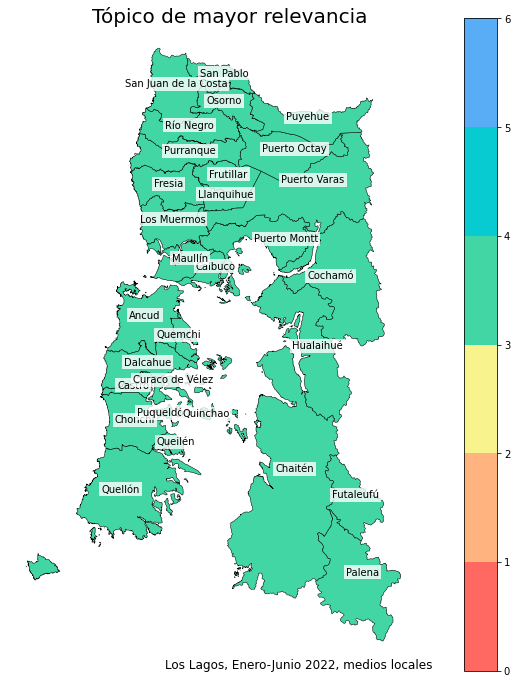

In [148]:
# --- Graficamos topico de mayor relevancia ---
territory_topicos.plot(column="topic_1", cmap=colors.ListedColormap(list(color_dict.values())), legend=True, figsize=(16, 12), edgecolor="black", linewidth=0.5,missing_kwds={
        'color': 'lightgrey',
        'hatch': '///',
        'edgecolor': 'red',
        'label': 'Missing values',
}, vmin=0, vmax=max_topics ).set_axis_off();

# -- Información --
plt.text(0.58, 0.875, 'Tópico de mayor relevancia', fontsize=20, ha='center', transform=plt.gcf().transFigure);

for idx, row in territory_topicos.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(.64, 0.128, "Los Lagos, Enero-Junio 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Tópico de mayor relevancia"), bbox_inches = "tight",transparent = True)


## Ejemplos donde se menciona al 'topico 3' -> Guardamos en txt

In [149]:
len(df)

1556

In [150]:
# Ejemplos donde se hace mencion de alguna comuna y el topico relevante es el 3
# dominant_topic === 3 and at least 1 comuna > 1
df_ex = df_topics[(df_topics['dominant_Topic'] == 3) & (df_topics['Puerto_Montt'] > 0)]

n = 10

# Crearemos un archivo txt y lo llenaremos con 10 ejemplos de noticias
with open('./data/txt_pdf/ejemplos_topic3_Puerto_Montt.txt', 'w') as f:
    for i in range(n):
        r = random.randint(0,len(df_ex)-1)
        f.write(df_ex.iloc[r]['text'])
        # Salto de linea : backslash: \n
        f.write('\n')

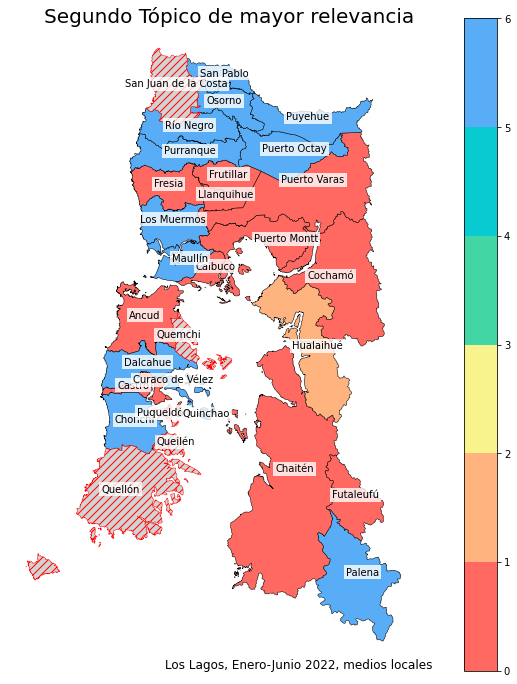

In [151]:
# --- Graficamos segundo topico de mayor relevancia ---
territory_topicos.plot(column="topic_2", cmap=colors.ListedColormap(list(color_dict.values())), legend=True, figsize=(16, 12), edgecolor="black", linewidth=0.5,missing_kwds={
        'color': 'lightgrey',
        'hatch': '///',
        'edgecolor': 'red',
        'label': 'Missing values',
}, vmin=0, vmax=max_topics).set_axis_off();

# -- Información --
plt.text(0.58, 0.875, 'Segundo Tópico de mayor relevancia', fontsize=20, ha='center', transform=plt.gcf().transFigure);

for idx, row in territory_topicos.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(.64, 0.128, "Los Lagos, Enero-Junio 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Segundo Tópico de mayor relevancia"), bbox_inches = "tight",transparent = True)

### Grafico mapa por positividad

In [152]:
territory_positividad.head(3)

,Comuna,geometry,coords
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...","(-8216686.860888084, -5162692.993100001)"
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...","(-8148106.117221469, -5115110.540750001)"
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...","(-8227801.498338105, -5230294.630800001)"


In [153]:
df.head(2)

,document_No,dominant_Topic,topic_Perc_Contrib,keywords,text,id_news,country,media_outlet,url,title,...,Dalcahue,Curaco_de_Vélez,Cochamó,Chonchi,Chaitén,Castro,Calbuco,Ancud,title_label,title_score
0,0,3,0.9890,"trabajo, parte, personas, año, región, través,...",Un aumento de mercados laborales poco dispuest...,47316734.0,chile,seminariolocal,https://www.semanariolocal.cl/archivos/6420,Parlamentario pide incentivar contratación de ...,...,0,0,0,0,0,0,0,0,NEU,0.989185
1,1,3,0.9555,"trabajo, parte, personas, año, región, través,...","Casi 415 mil personas estaban empleadas, en pr...",22598469.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2022/05/03/...,En medio de inestabilidad económica preocupa p...,...,0,0,0,0,0,0,0,0,NEG,0.997927


In [154]:
# --- Creamos df de positividad ---
df_comunas_positividad = pd.DataFrame(columns=['negativo', 'neutro', 'positivo', 'total', 'perc_negativo', 'perc_neutro', 'perc_positivo'], index=comunas)
df_comunas_positividad.head(3)

,negativo,neutro,positivo,total,perc_negativo,perc_neutro,perc_positivo
Ancud,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calbuco,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Castro,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# --- Contabilizamos las apariciones de cada comuna ---
for comuna in comunas:
    petitionSQLDF = 'SELECT '+comuna+',title_label, title_score FROM df_topics WHERE '+comuna+'>0'
    result = sqldf(petitionSQLDF)
    # # --- Una vez que hicimos la consulta por comuna ---
    # # -- Tomamos la NEG, NEU y POS de cada noticia --
    neg = []
    neu = []
    pos = []

    for index, row in result.iterrows():
        if row['title_label'] == 'NEG':
            neg.append(row[comuna])
        elif row['title_label'] == 'NEU':
            neu.append(row[comuna])
        elif row['title_label'] == 'POS':
            pos.append(row[comuna])
    
    # --- Agregamos los datos a la tabla ---
    df_comunas_positividad.loc[comuna] = [sum(neg), sum(neu), sum(pos), len(result), sum(neg)/len(result), sum(neu)/len(result), sum(pos)/len(result)]
df_comunas_positividad

,negativo,neutro,positivo,total,perc_negativo,perc_neutro,perc_positivo
Ancud,8,87,16,111,0.072072,0.783784,0.144144
Calbuco,5,52,10,67,0.074627,0.776119,0.149254
Castro,17,91,22,130,0.130769,0.7,0.169231
Chaitén,1,25,5,31,0.032258,0.806452,0.16129
Chonchi,5,25,6,36,0.138889,0.694444,0.166667
Cochamó,2,42,8,52,0.038462,0.807692,0.153846
Curaco_de_Vélez,0,19,4,23,0.0,0.826087,0.173913
Dalcahue,2,26,1,29,0.068966,0.896552,0.034483
Fresia,1,21,6,28,0.035714,0.75,0.214286
Frutillar,4,37,16,57,0.070175,0.649123,0.280702


In [156]:
# --- Agregamos los datos de positividad a territory_positividad ---
territory_positividad['negativo'] = list(df_comunas_positividad['negativo'].values)
territory_positividad['neutro'] = list(df_comunas_positividad['neutro'].values)
territory_positividad['positivo'] = list(df_comunas_positividad['positivo'].values)
territory_positividad['total'] = list(df_comunas_positividad['total'].values)
territory_positividad['perc_negativo'] = list(df_comunas_positividad['perc_negativo'].values)
territory_positividad['perc_neutro'] = list(df_comunas_positividad['perc_neutro'].values)
territory_positividad['perc_positivo'] = list(df_comunas_positividad['perc_positivo'].values)
territory_positividad.head(3)


,Comuna,geometry,coords,negativo,neutro,positivo,total,perc_negativo,perc_neutro,perc_positivo
161,Ancud,"MULTIPOLYGON (((-8254683.395 -5190030.921, -82...","(-8216686.860888084, -5162692.993100001)",8,87,16,111,0.072072,0.783784,0.144144
254,Calbuco,"MULTIPOLYGON (((-8112967.653 -5147692.027, -81...","(-8148106.117221469, -5115110.540750001)",5,52,10,67,0.074627,0.776119,0.149254
167,Castro,"MULTIPOLYGON (((-8171095.068 -5254002.891, -81...","(-8227801.498338105, -5230294.630800001)",17,91,22,130,0.130769,0.700000,0.169231


### Grafico mapa por negatividad

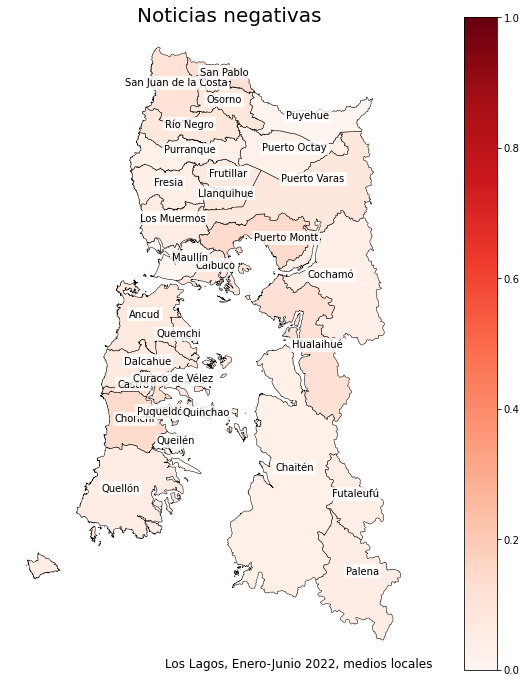

In [157]:
# --- Graficamos por noticias negativas ---
territory_positividad.plot(column="perc_negativo", cmap='Reds', legend=True, figsize=(16, 12), edgecolor="black", linewidth=0.5,missing_kwds={
        'color': 'lightgrey',
        'hatch': '///',
        'edgecolor': 'black',
        'label': 'Missing values',
}, vmin=0, vmax=1).set_axis_off();

# -- Información --
plt.text(0.58, 0.875, 'Noticias negativas', fontsize=20, ha='center', transform=plt.gcf().transFigure);

for idx, row in territory_positividad.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(.64, 0.128, "Los Lagos, Enero-Junio 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Noticias negativas"), bbox_inches = "tight",transparent = True)

### Grafico mapa por neutro

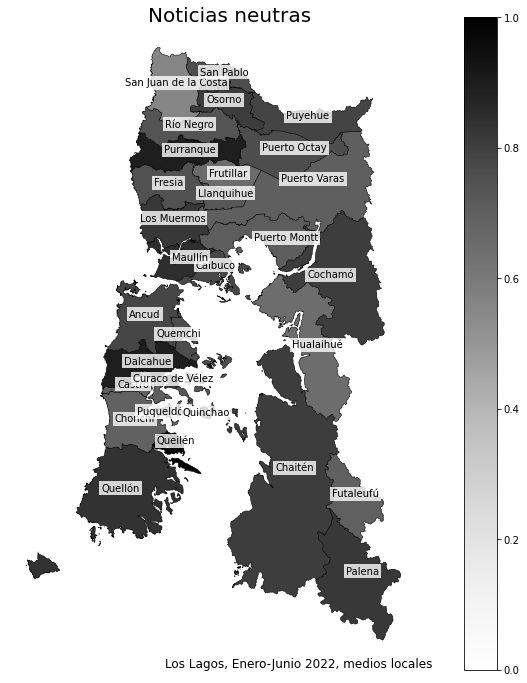

In [158]:
# --- Graficamos por noticias Neutras ---
territory_positividad.plot(column="perc_neutro", cmap='Greys', legend=True, figsize=(16, 12), edgecolor="black", linewidth=0.5,missing_kwds={
        'color': 'lightgrey',
        'hatch': '///',
        'edgecolor': 'black',
        'label': 'Missing values',
}, vmin=0, vmax=1).set_axis_off();

# -- Información --
plt.text(0.58, 0.875, 'Noticias neutras', fontsize=20, ha='center', transform=plt.gcf().transFigure);

for idx, row in territory_topicos.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(.64, 0.128, "Los Lagos, Enero-Junio 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Noticias neutras"), bbox_inches = "tight",transparent = True)

### Grafico mapa por positividad

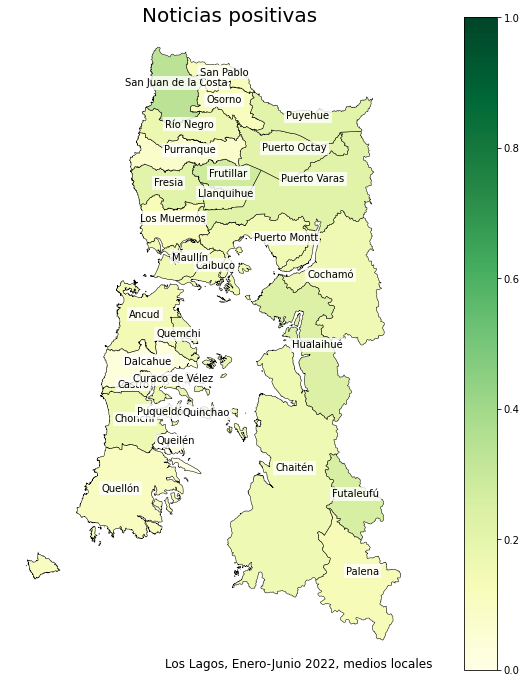

In [159]:
# --- Graficamos por noticias Neutras ---
territory_positividad.plot(column="perc_positivo", cmap='YlGn', legend=True, figsize=(16, 12), edgecolor="black", linewidth=0.5,missing_kwds={
        'color': 'lightgrey',
        'hatch': '///',
        'edgecolor': 'black',
        'label': 'Missing values',
}, vmin=0, vmax=1).set_axis_off();

# -- Información --
plt.text(0.58, 0.875, 'Noticias positivas', fontsize=20, ha='center', transform=plt.gcf().transFigure);

for idx, row in territory_positividad.iterrows():
    plt.text(row.coords[0], row.coords[1], s=row['Comuna'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    # plt.text(row.coords[0], row.coords[1]-.5, s=round(row['perc_positivo'],2), horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

plt.text(.64, 0.128, "Los Lagos, Enero-Junio 2022, medios locales", fontsize=12, ha='center', transform=plt.gcf().transFigure);
plt.savefig('./data/images//{}.svg'.format("Noticias positivas"), bbox_inches = "tight",transparent = True)

## Ejemplo noticias positivas, neutras y negativas

In [160]:
# Creamos un archivo
with open('./data/txt_pdf/ejemplos_territory_POS_NEU_NEG.txt', 'w') as f:
    # Seleccionamos n ejemplos para df
    p = ['POS','NEU', 'NEG']
    for sentimiento in p:
        df_temp = df[df['title_label']== sentimiento]
        # Guardamos el titulo, title_label y title_score
        df_temp = df_temp[['title', 'title_label', 'title_score']]
        df_temp = df_temp.sample(n=20)
        # guardamos en el archivo
        for content in df_temp.values:
            f.write(content[0] + ' ; ' + content[1] + ' ; ' + str(content[2]))
            f.write('\n')
        f.write('\n')
        f.write('\n')
        